In [162]:
# %%
import pandas as pd
import numpy as np
import pyodbc
import warnings
warnings.filterwarnings("ignore")
from datetime import timedelta
import datetime
from interval3 import Interval, IntervalSet
from tqdm import tqdm
from importlib import reload
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_columns', 150)
from sqlalchemy import create_engine
from matplotlib import pyplot as plt
import os

from matplotlib.font_manager import FontProperties
myfont=FontProperties(fname=r'C:\Users\chiehlinchen\Desktop\msj.ttf',size=14)
# sns.set(font=myfont.get_family(), rc={'figure.figsize':(5,4)}, font_scale= 2)
# sns.set_style("whitegrid",{"font.sans-serif":['Microsoft JhengHei']})
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']
plt.rcParams['axes.unicode_minus'] =False
plt.rcParams['axes.facecolor']='whitesmoke'

# %%
today = datetime.datetime.now().strftime("%Y%m%d")


In [163]:
d3 = pd.read_csv(r'D:\各期限比較\三日沖.csv')
inday = pd.read_csv(r'D:\各期限比較\當沖.csv')
TCRI =list(pd.read_excel(r"C:\Users\chiehlinchen\Downloads\TCRINEW.xlsx")['NUM'].astype(str))

inday = inday[inday['instrument'].astype(str).isin(TCRI)].reset_index(drop = True)
d3 = d3[d3['instrument'].astype(str).isin(TCRI)].reset_index(drop = True)

In [164]:
df = pd.DataFrame()
df['日期'] = inday.groupby(['datetime']).head(5)['datetime']
df = df.reset_index(drop = True)
df['當沖多單報酬率(加成本0.15%)'] = inday.groupby(['datetime']).head(5).reset_index(drop=True)['label']-0.0015
df['當沖多單報酬率(加成本0.335%)'] = inday.groupby(['datetime']).head(5).reset_index(drop=True)['label']-0.00335
df['當沖多單報酬率(加成本0.435%)'] = inday.groupby(['datetime']).head(5).reset_index(drop=True)['label']-0.00435

df['當沖空單報酬率(加成本0.15%)'] = inday.groupby(['datetime']).tail(5).reset_index(drop=True)['label']*(-1) -0.0015
df['當沖空單報酬率(加成本0.335%)'] = inday.groupby(['datetime']).tail(5).reset_index(drop=True)['label']*(-1) -0.00335
df['當沖空單報酬率(加成本0.435%)'] = inday.groupby(['datetime']).tail(5).reset_index(drop=True)['label']*(-1) -0.00435

df['三日沖多單報酬率(加成本0.3%)'] = d3.groupby(['datetime']).head(5).reset_index(drop=True)['label']-0.003
df['三日沖多單報酬率(加成本0.485%)'] = d3.groupby(['datetime']).head(5).reset_index(drop=True)['label']-0.00485
df['三日沖多單報酬率(加成本0.585%)'] = d3.groupby(['datetime']).head(5).reset_index(drop=True)['label']-0.00585

df['三日沖空單報酬率(加成本0.3%)'] = d3.groupby(['datetime']).tail(5).reset_index(drop=True)['label']*(-1) -0.003
df['三日沖空單報酬率(加成本0.485%)'] = d3.groupby(['datetime']).tail(5).reset_index(drop=True)['label']*(-1) -0.00485
df['三日沖空單報酬率(加成本0.585%)'] = d3.groupby(['datetime']).tail(5).reset_index(drop=True)['label']*(-1) -0.00585


df = df.dropna()

<AxesSubplot: ylabel='Frequency'>

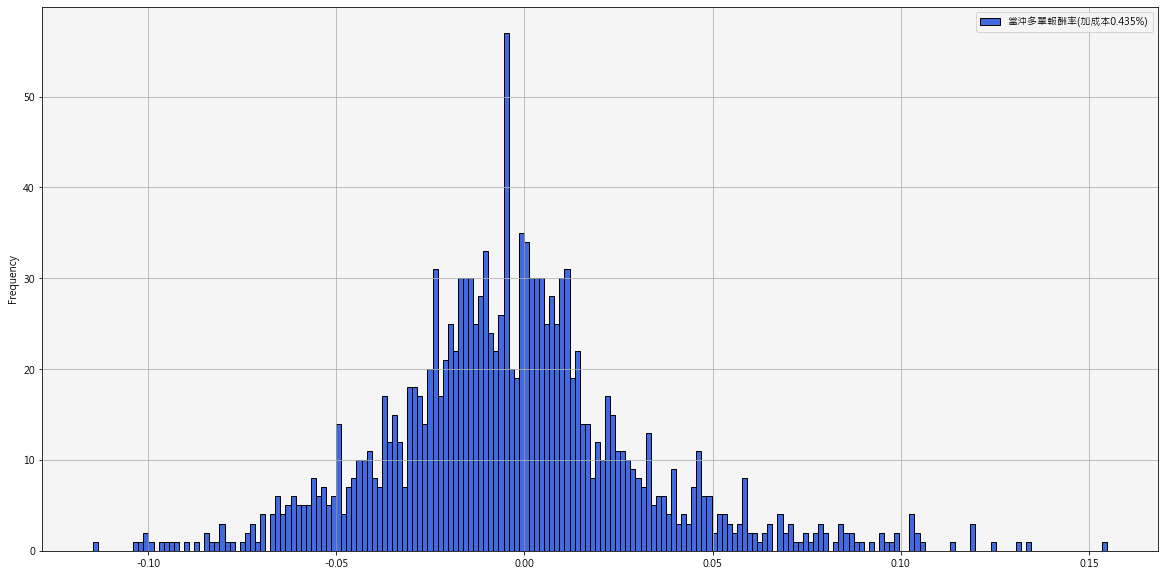

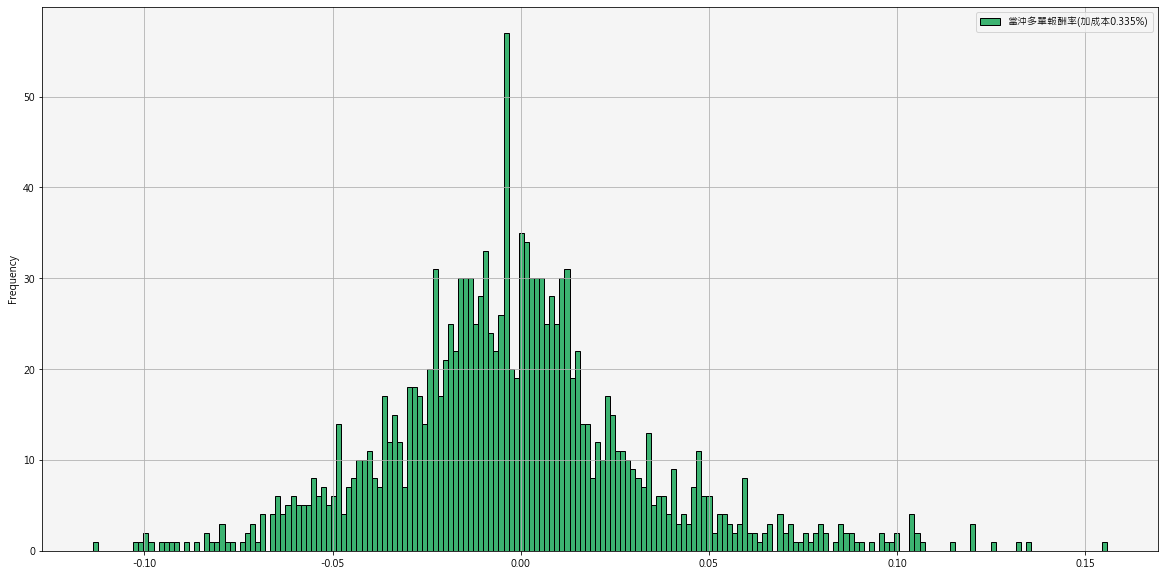

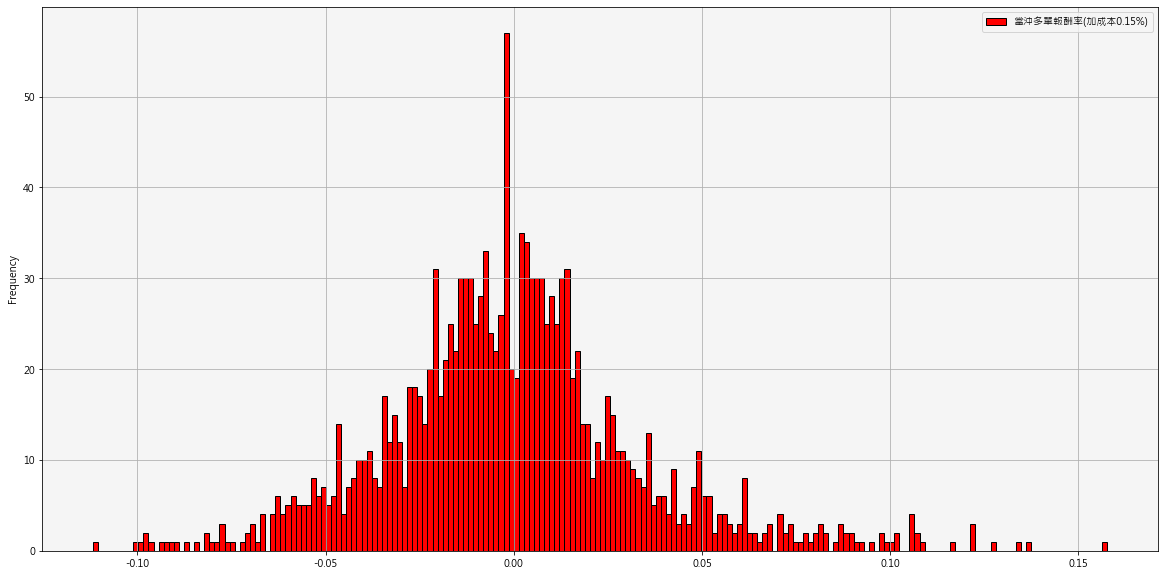

In [165]:
############################################################################################
#每日每股損益分配
#當沖
############################################################################################
df.set_index('日期')[['當沖多單報酬率(加成本0.435%)']].plot.hist(edgecolor='black', facecolor = 'royalblue',figsize = (20,10),bins=200,grid = True)
df.set_index('日期')[['當沖多單報酬率(加成本0.335%)']].plot.hist(edgecolor='black',facecolor = 'mediumseagreen',figsize = (20,10),bins=200,grid = True)
df.set_index('日期')[['當沖多單報酬率(加成本0.15%)']].plot.hist(edgecolor='black',facecolor = 'red',figsize = (20,10),bins=200,grid = True)

In [167]:
df.set_index('日期')[['當沖多單報酬率(加成本0.435%)','當沖多單報酬率(加成本0.335%)','當沖多單報酬率(加成本0.15%)']].describe().iloc[1:,:]

,當沖多單報酬率(加成本0.435%),當沖多單報酬率(加成本0.335%),當沖多單報酬率(加成本0.15%)
mean,-0.003538,-0.002538,-0.000688
std,0.033907,0.033907,0.033907
min,-0.114744,-0.113744,-0.111894
25%,-0.023160,-0.022160,-0.020310
50%,-0.004350,-0.003350,-0.001500
75%,0.011754,0.012754,0.014604
max,0.154858,0.155858,0.157708


<AxesSubplot: ylabel='Frequency'>

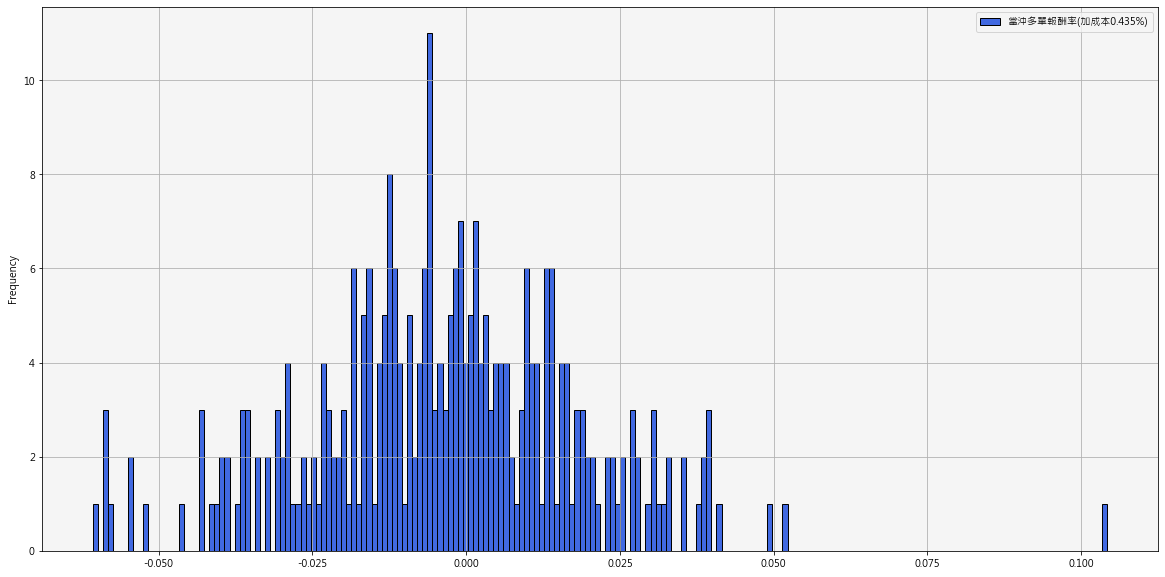

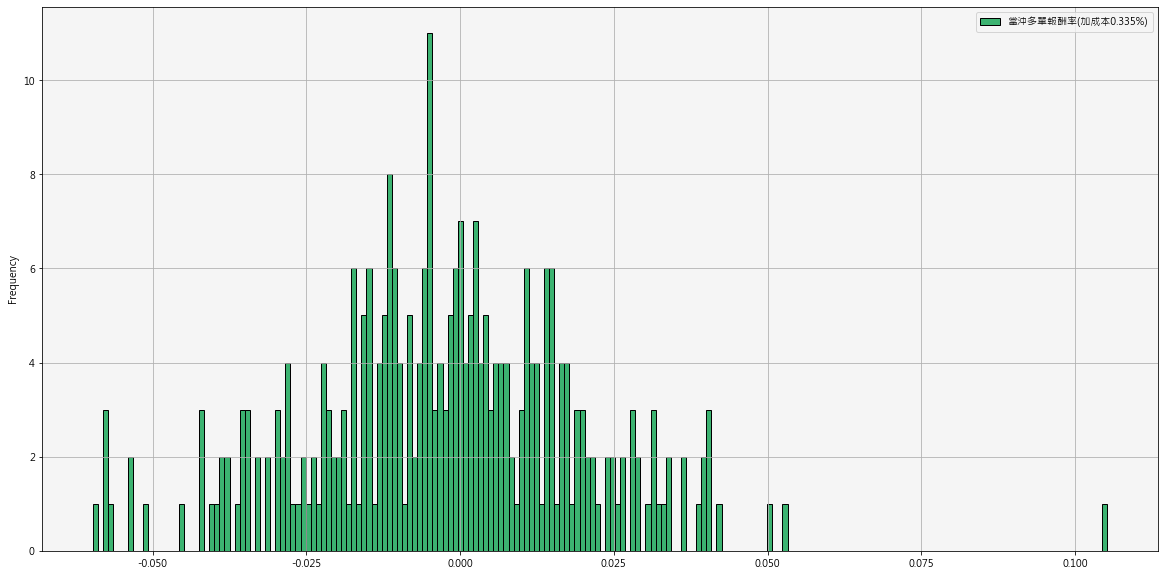

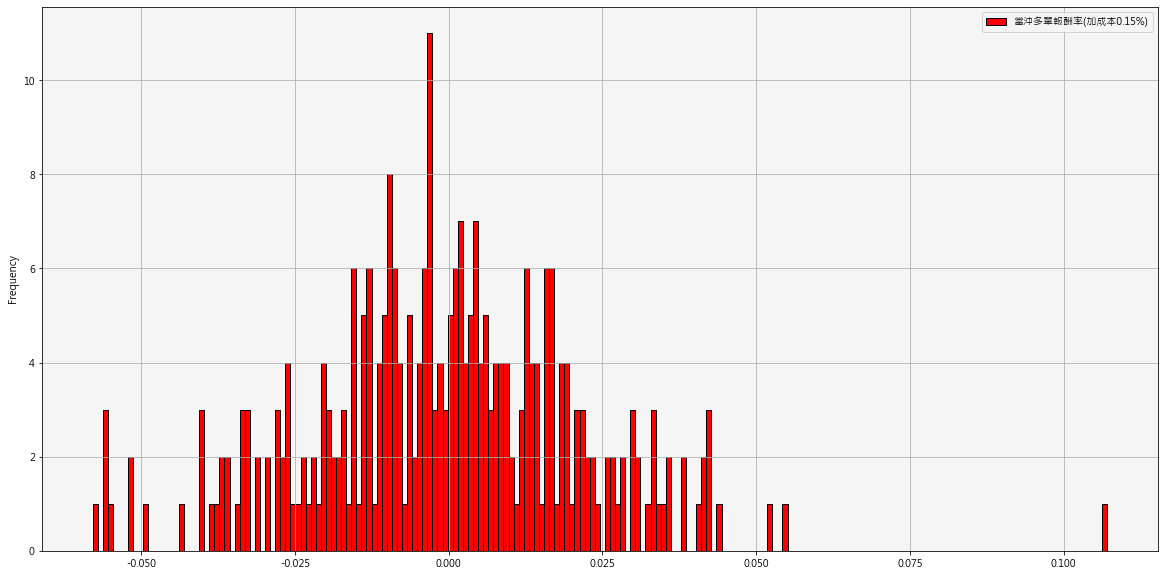

In [168]:
############################################################################################
#每日平均損益分配
#全市場
############################################################################################
df.groupby('日期').mean()[['當沖多單報酬率(加成本0.435%)']].plot.hist(edgecolor='black',figsize = (20,10), facecolor = 'royalblue',bins=200,grid = True)
df.groupby('日期').mean()[['當沖多單報酬率(加成本0.335%)']].plot.hist(edgecolor='black', facecolor = 'mediumseagreen', figsize = (20,10),bins=200,grid = True)
df.groupby('日期').mean()[['當沖多單報酬率(加成本0.15%)']].plot.hist(edgecolor='black', facecolor = 'red' ,figsize = (20,10),bins=200,grid = True)

In [169]:
df.groupby('日期').mean()[['當沖多單報酬率(加成本0.435%)','當沖多單報酬率(加成本0.335%)','當沖多單報酬率(加成本0.15%)']].describe().iloc[1:,:]

,當沖多單報酬率(加成本0.435%),當沖多單報酬率(加成本0.335%),當沖多單報酬率(加成本0.15%)
mean,-0.003538,-0.002538,-0.000688
std,0.022126,0.022126,0.022126
min,-0.060754,-0.059754,-0.057904
25%,-0.016508,-0.015508,-0.013658
50%,-0.003685,-0.002685,-0.000835
75%,0.010521,0.011521,0.013371
max,0.104221,0.105221,0.107071


<AxesSubplot: xlabel='日期'>

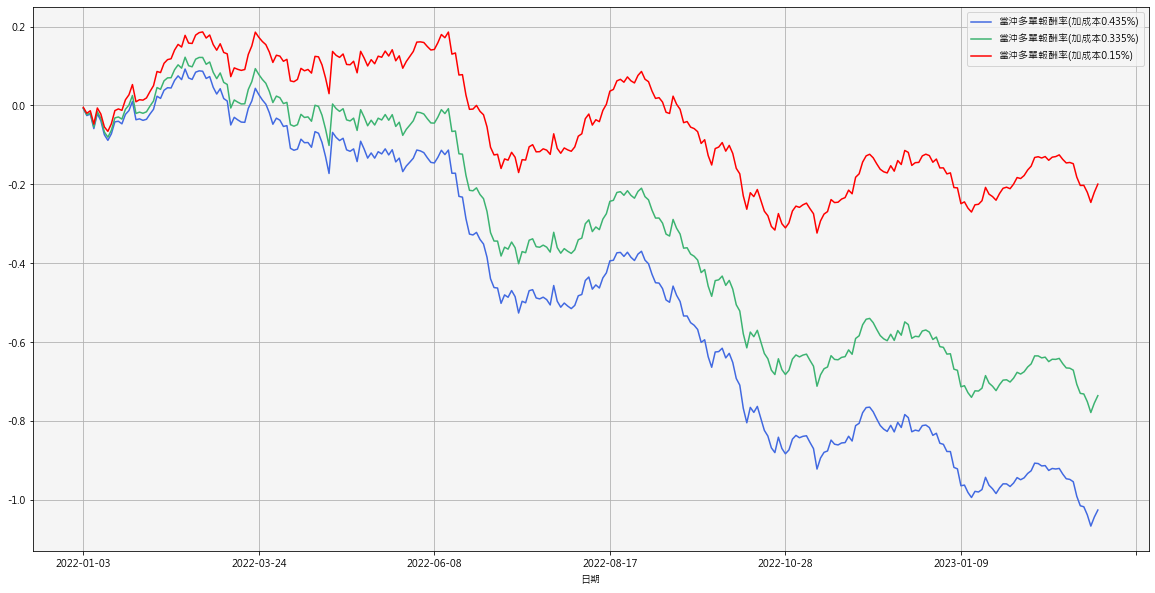

In [170]:
df.groupby('日期').mean().cumsum()[['當沖多單報酬率(加成本0.435%)','當沖多單報酬率(加成本0.335%)','當沖多單報酬率(加成本0.15%)']].plot(figsize=(20, 10),color = ['royalblue','mediumseagreen','red'],grid = True)

<AxesSubplot: ylabel='Frequency'>

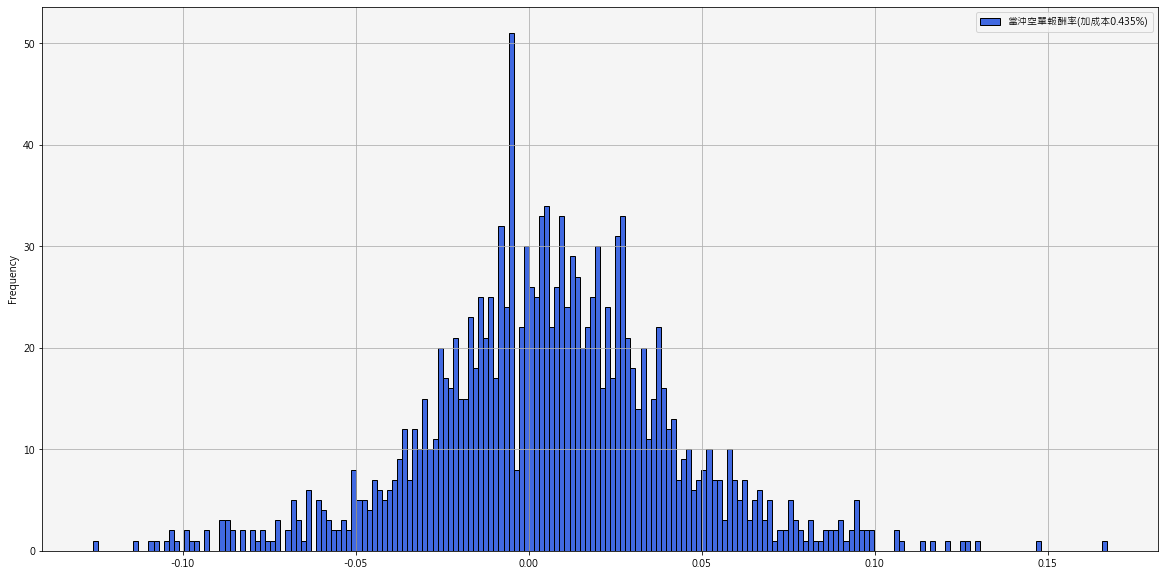

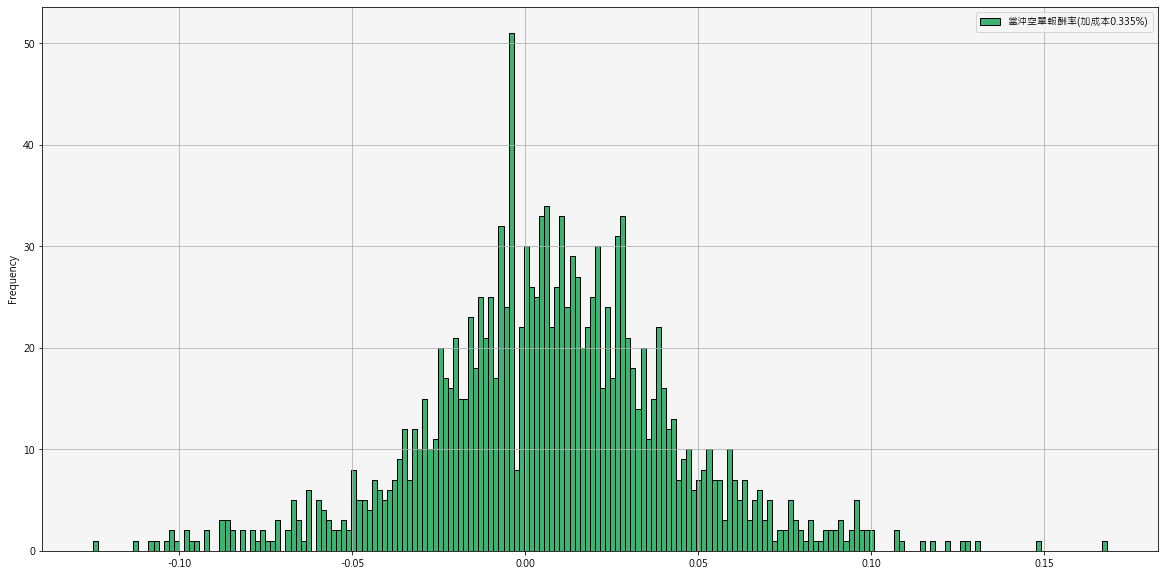

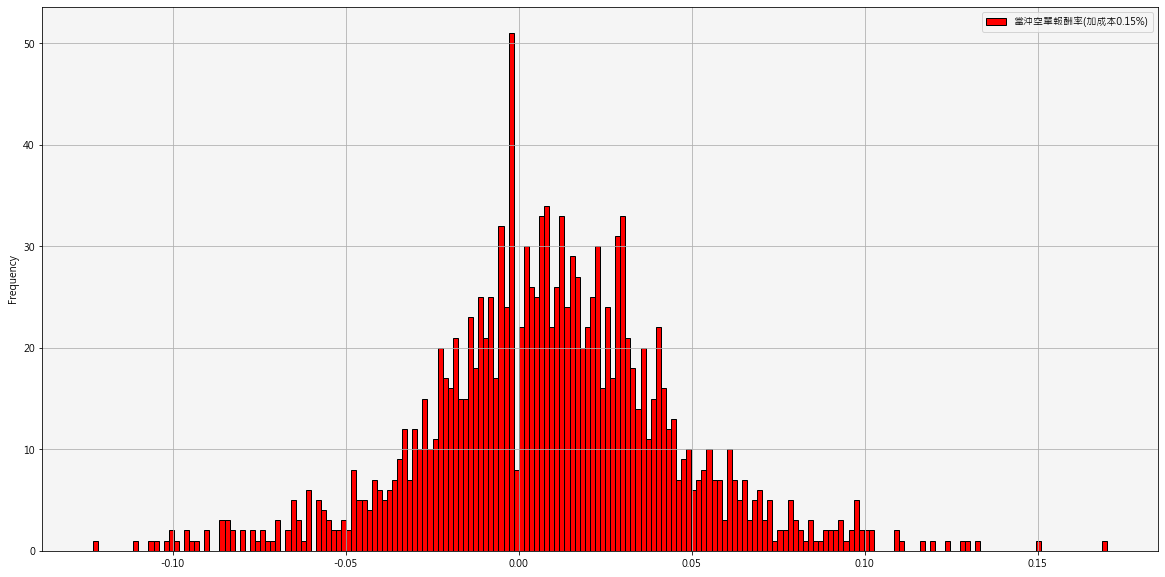

In [171]:
############################################################################################
#每日每股損益分配
#當沖
############################################################################################
df.set_index('日期')[['當沖空單報酬率(加成本0.435%)']].plot.hist(edgecolor='black', facecolor = 'royalblue',figsize = (20,10),bins=200,grid = True)
df.set_index('日期')[['當沖空單報酬率(加成本0.335%)']].plot.hist(edgecolor='black',facecolor = 'mediumseagreen',figsize = (20,10),bins=200,grid = True)
df.set_index('日期')[['當沖空單報酬率(加成本0.15%)']].plot.hist(edgecolor='black',facecolor = 'red',figsize = (20,10),bins=200,grid = True)

In [172]:
df.set_index('日期')[['當沖空單報酬率(加成本0.435%)','當沖空單報酬率(加成本0.335%)','當沖空單報酬率(加成本0.15%)']].describe().iloc[1:,:]

,當沖空單報酬率(加成本0.435%),當沖空單報酬率(加成本0.335%),當沖空單報酬率(加成本0.15%)
mean,0.006360,0.007360,0.009210
std,0.035736,0.035736,0.035736
min,-0.125984,-0.124984,-0.123134
25%,-0.014267,-0.013267,-0.011417
50%,0.005769,0.006769,0.008619
75%,0.026932,0.027932,0.029782
max,0.167223,0.168223,0.170073


<AxesSubplot: ylabel='Frequency'>

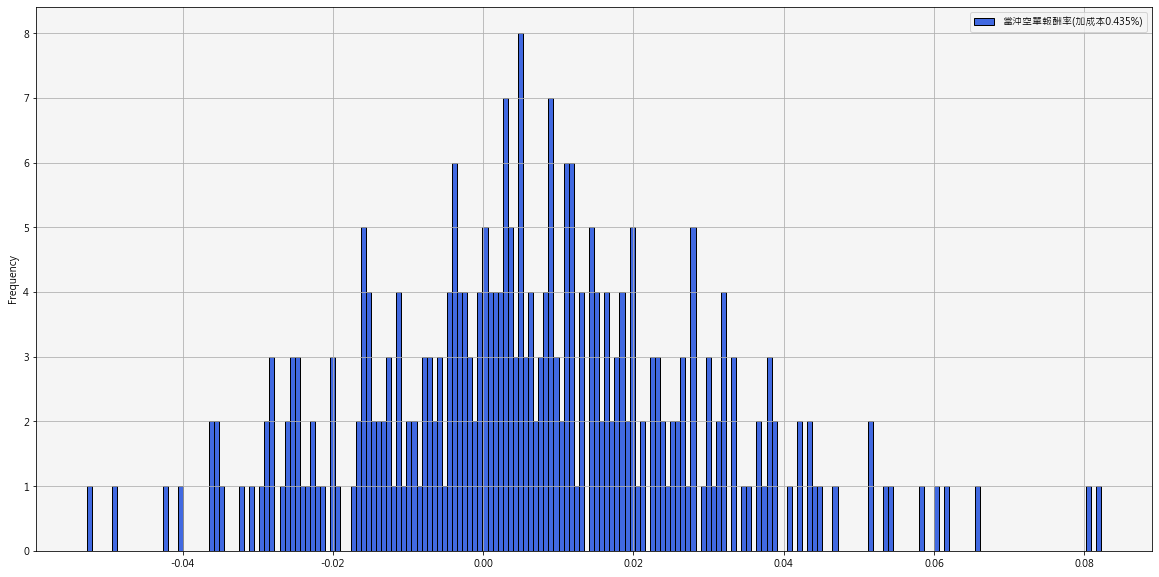

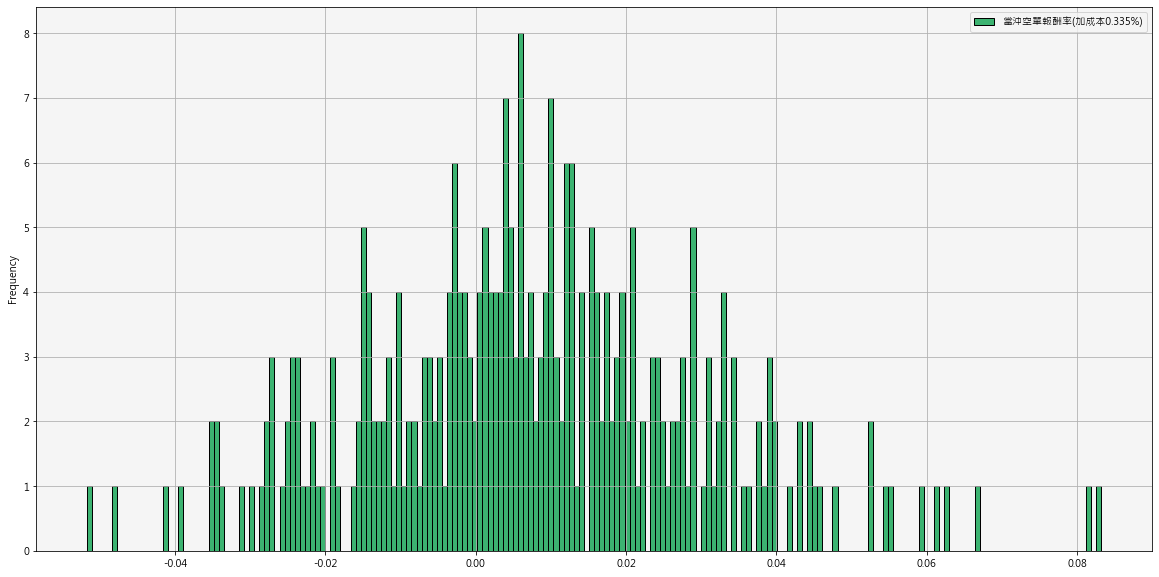

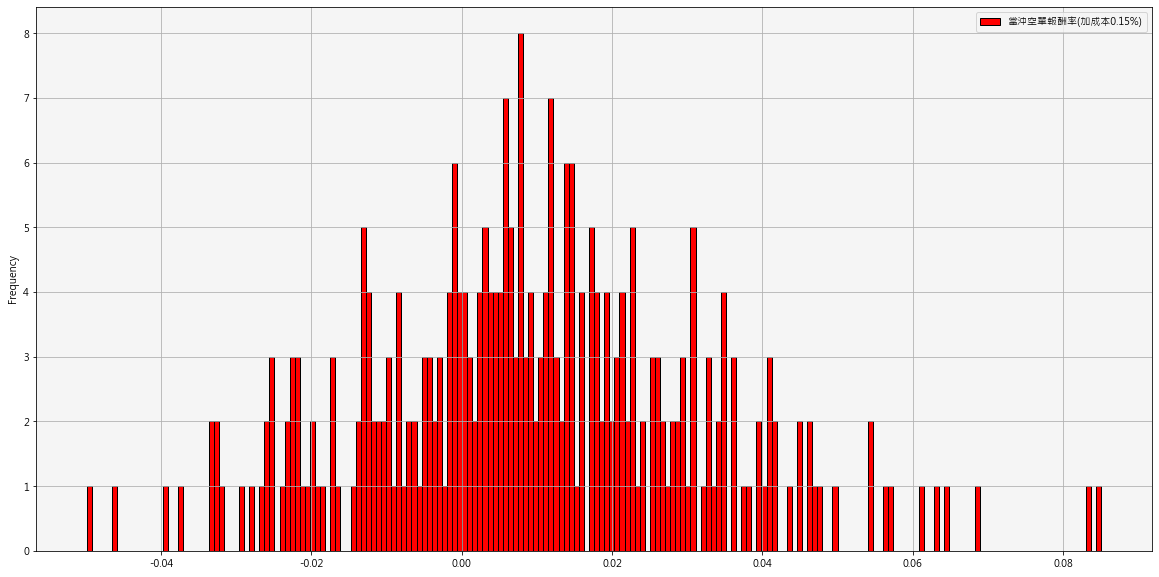

In [173]:
############################################################################################
#每日平均損益分配
#全市場
############################################################################################
df.groupby('日期').mean()[['當沖空單報酬率(加成本0.435%)']].plot.hist(edgecolor='black',figsize = (20,10), facecolor = 'royalblue',bins=200,grid = True)
df.groupby('日期').mean()[['當沖空單報酬率(加成本0.335%)']].plot.hist(edgecolor='black', facecolor = 'mediumseagreen', figsize = (20,10),bins=200,grid = True)
df.groupby('日期').mean()[['當沖空單報酬率(加成本0.15%)']].plot.hist(edgecolor='black', facecolor = 'red' ,figsize = (20,10),bins=200,grid = True)

In [174]:
df.groupby('日期').mean()[['當沖空單報酬率(加成本0.435%)','當沖空單報酬率(加成本0.335%)','當沖空單報酬率(加成本0.15%)']].describe().iloc[1:,:]

,當沖空單報酬率(加成本0.435%),當沖空單報酬率(加成本0.335%),當沖空單報酬率(加成本0.15%)
mean,0.006360,0.007360,0.009210
std,0.021925,0.021925,0.021925
min,-0.052735,-0.051735,-0.049885
25%,-0.007369,-0.006369,-0.004519
50%,0.005142,0.006142,0.007992
75%,0.018955,0.019955,0.021805
max,0.082253,0.083253,0.085103


<AxesSubplot: xlabel='日期'>

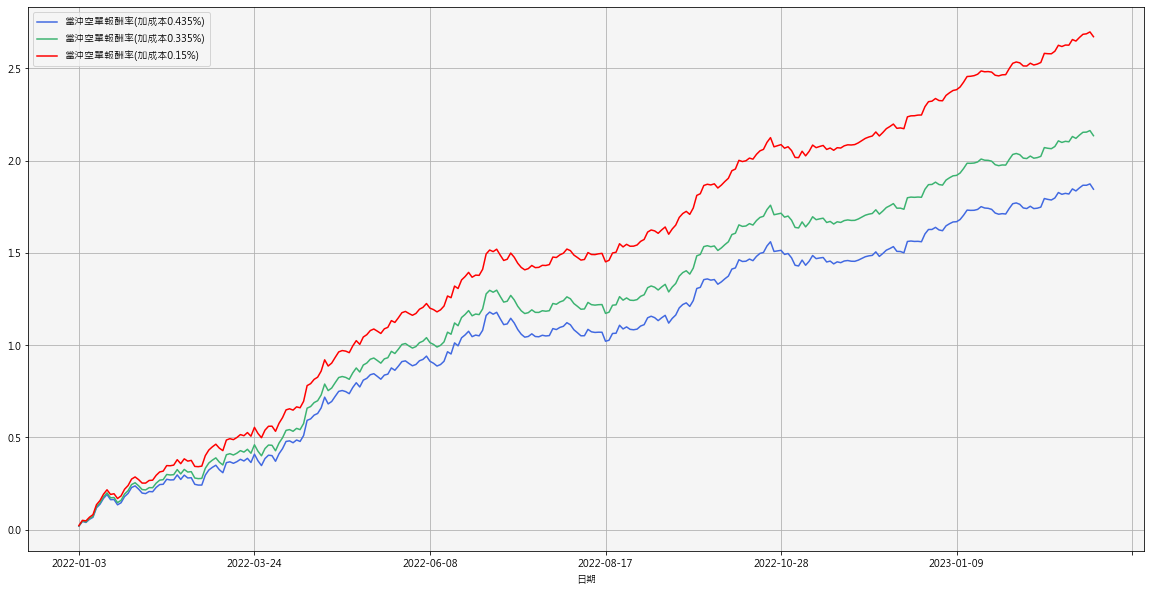

In [175]:
df.groupby('日期').mean().cumsum()[['當沖空單報酬率(加成本0.435%)','當沖空單報酬率(加成本0.335%)','當沖空單報酬率(加成本0.15%)']].plot(figsize=(20, 10),color = ['royalblue','mediumseagreen','red'],grid = True)

<AxesSubplot: ylabel='Frequency'>

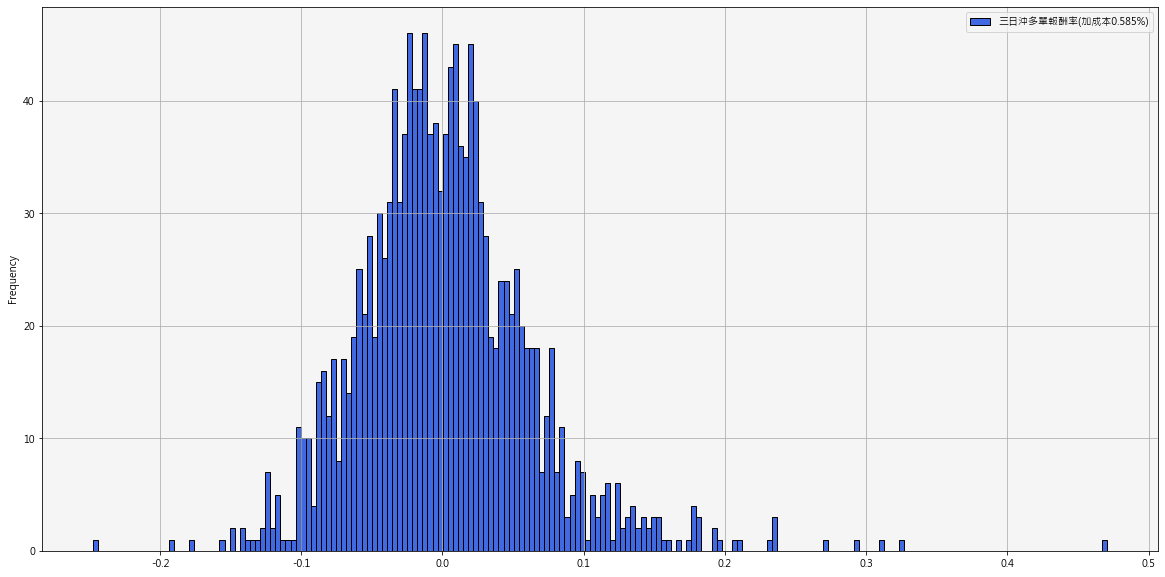

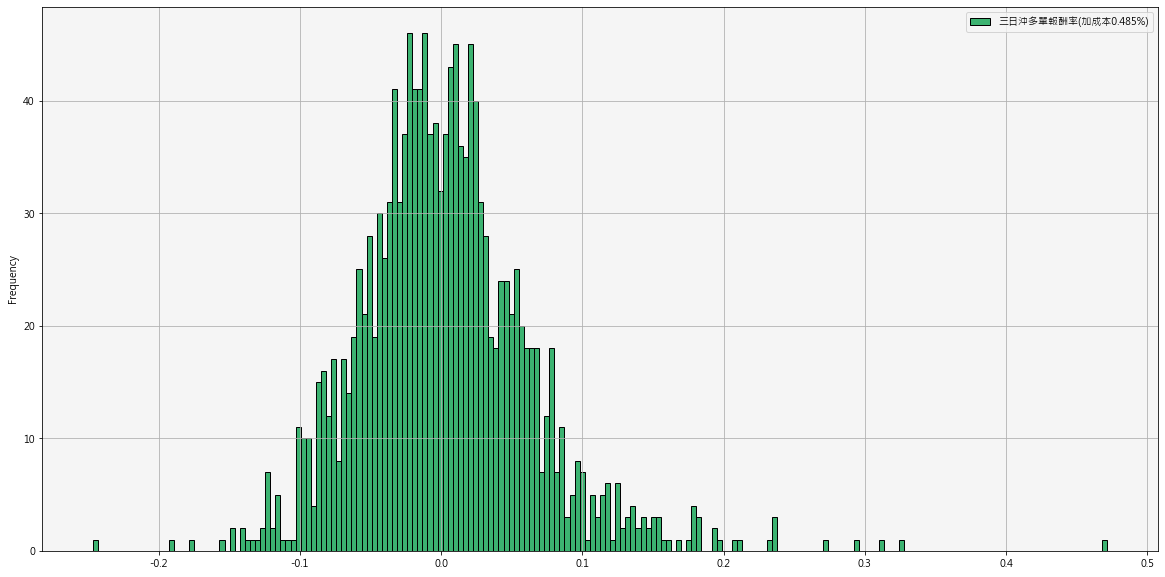

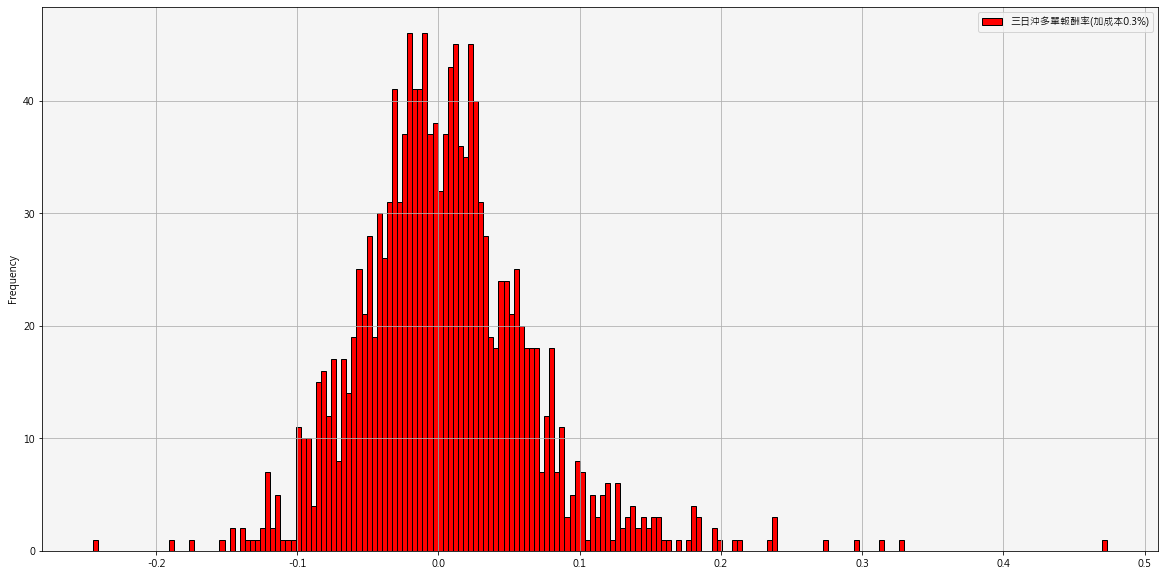

In [176]:
############################################################################################
#每日每股損益分配
#三日沖
############################################################################################
df.set_index('日期')[['三日沖多單報酬率(加成本0.585%)']].plot.hist(edgecolor='black', facecolor = 'royalblue',figsize = (20,10),bins=200,grid = True)
df.set_index('日期')[['三日沖多單報酬率(加成本0.485%)']].plot.hist(edgecolor='black',facecolor = 'mediumseagreen',figsize = (20,10),bins=200,grid = True)
df.set_index('日期')[['三日沖多單報酬率(加成本0.3%)']].plot.hist(edgecolor='black',facecolor = 'red',figsize = (20,10),bins=200,grid = True)

In [177]:
df.set_index('日期')[['三日沖多單報酬率(加成本0.585%)','三日沖多單報酬率(加成本0.485%)','三日沖多單報酬率(加成本0.3%)']].describe().iloc[1:,:]

,三日沖多單報酬率(加成本0.585%),三日沖多單報酬率(加成本0.485%),三日沖多單報酬率(加成本0.3%)
mean,0.001267,0.002267,0.004117
std,0.061397,0.061397,0.061397
min,-0.247627,-0.246627,-0.244777
25%,-0.035904,-0.034904,-0.033054
50%,-0.003229,-0.002229,-0.000379
75%,0.031484,0.032484,0.034334
max,0.470627,0.471627,0.473477


<AxesSubplot: ylabel='Frequency'>

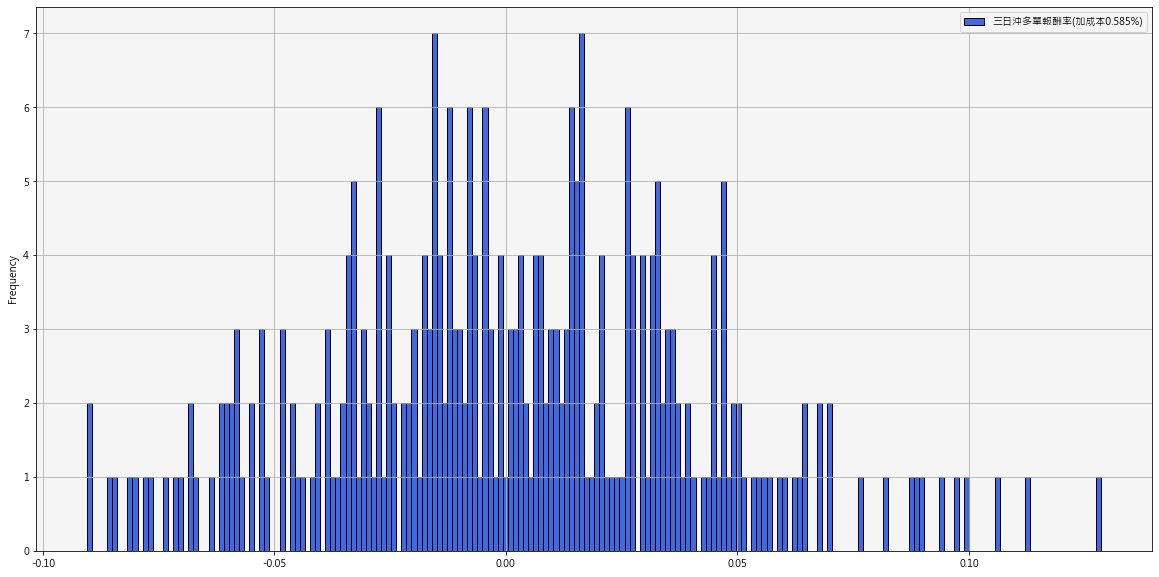

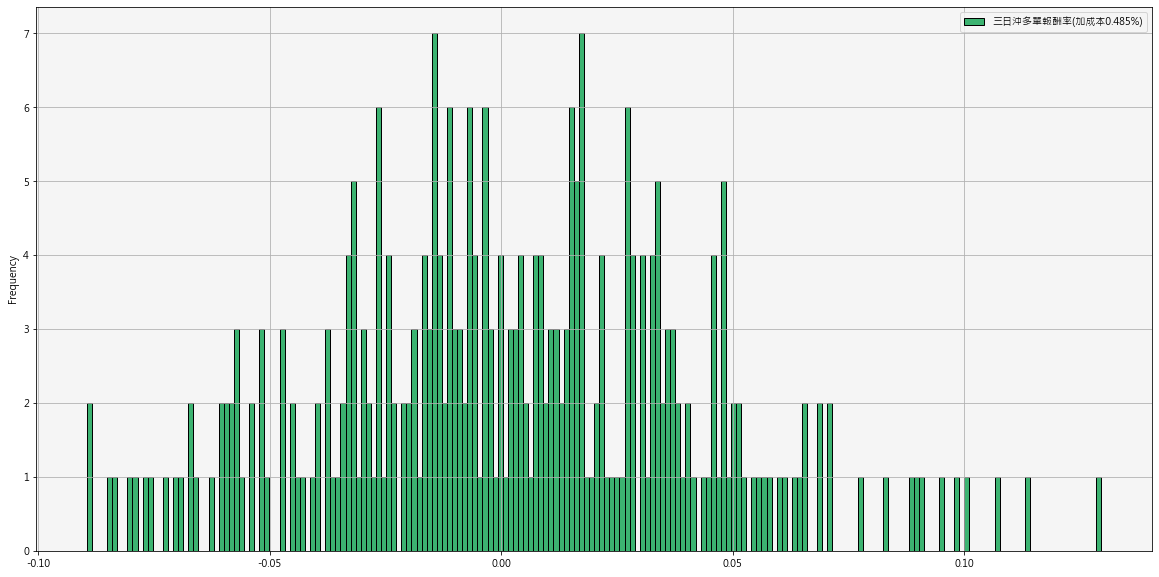

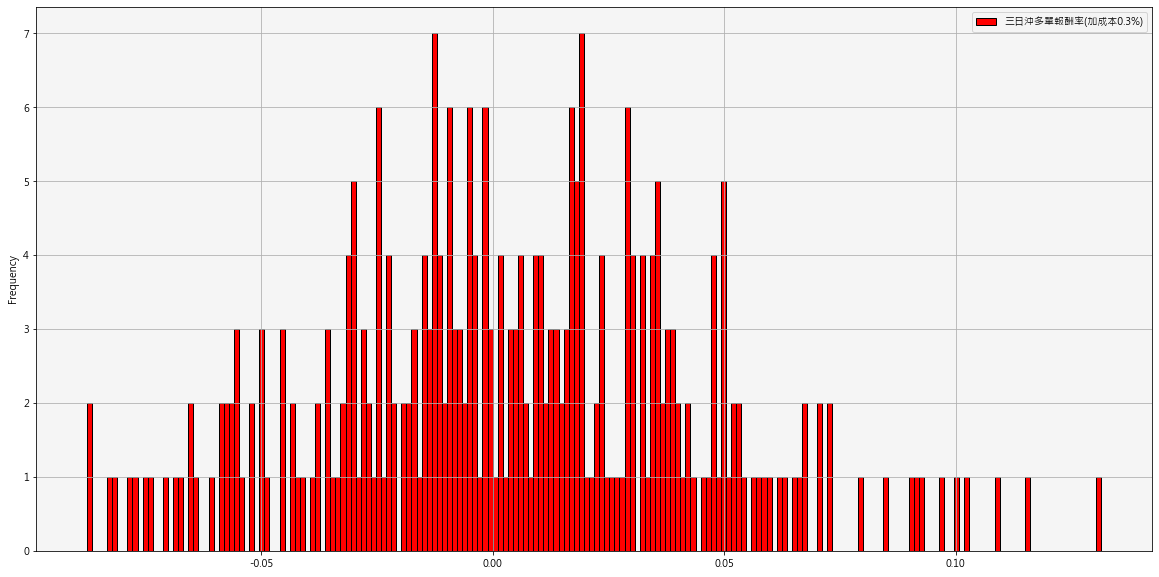

In [178]:
############################################################################################
#每日平均損益分配
#全市場
############################################################################################
df.groupby('日期').mean()[['三日沖多單報酬率(加成本0.585%)']].plot.hist(edgecolor='black',figsize = (20,10), facecolor = 'royalblue',bins=200,grid = True)
df.groupby('日期').mean()[['三日沖多單報酬率(加成本0.485%)']].plot.hist(edgecolor='black', facecolor = 'mediumseagreen', figsize = (20,10),bins=200,grid = True)
df.groupby('日期').mean()[['三日沖多單報酬率(加成本0.3%)']].plot.hist(edgecolor='black', facecolor = 'red' ,figsize = (20,10),bins=200,grid = True)

In [179]:
df.groupby('日期').mean()[['三日沖多單報酬率(加成本0.585%)','三日沖多單報酬率(加成本0.485%)','三日沖多單報酬率(加成本0.3%)']].describe().iloc[1:,:]

,三日沖多單報酬率(加成本0.585%),三日沖多單報酬率(加成本0.485%),三日沖多單報酬率(加成本0.3%)
mean,0.001267,0.002267,0.004117
std,0.039785,0.039785,0.039785
min,-0.090512,-0.089512,-0.087662
25%,-0.024996,-0.023996,-0.022146
50%,0.000053,0.001053,0.002903
75%,0.027151,0.028151,0.030001
max,0.128583,0.129583,0.131433


<AxesSubplot: xlabel='日期'>

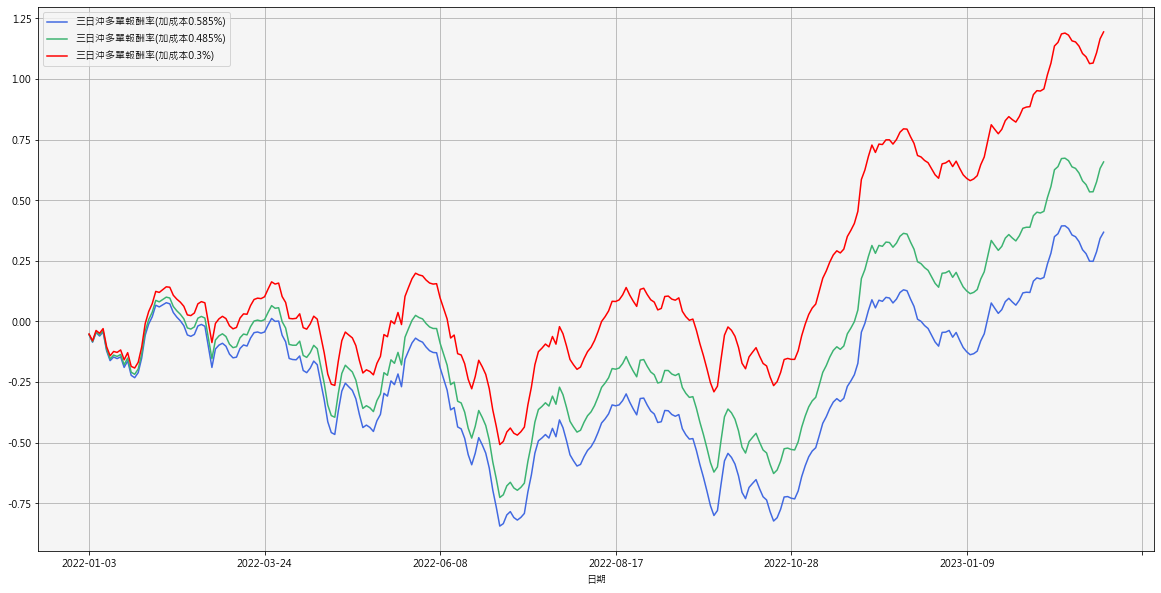

In [180]:
df.groupby('日期').mean().cumsum()[['三日沖多單報酬率(加成本0.585%)','三日沖多單報酬率(加成本0.485%)','三日沖多單報酬率(加成本0.3%)']].plot(figsize=(20, 10),color = ['royalblue','mediumseagreen','red'],grid = True)

<AxesSubplot: ylabel='Frequency'>

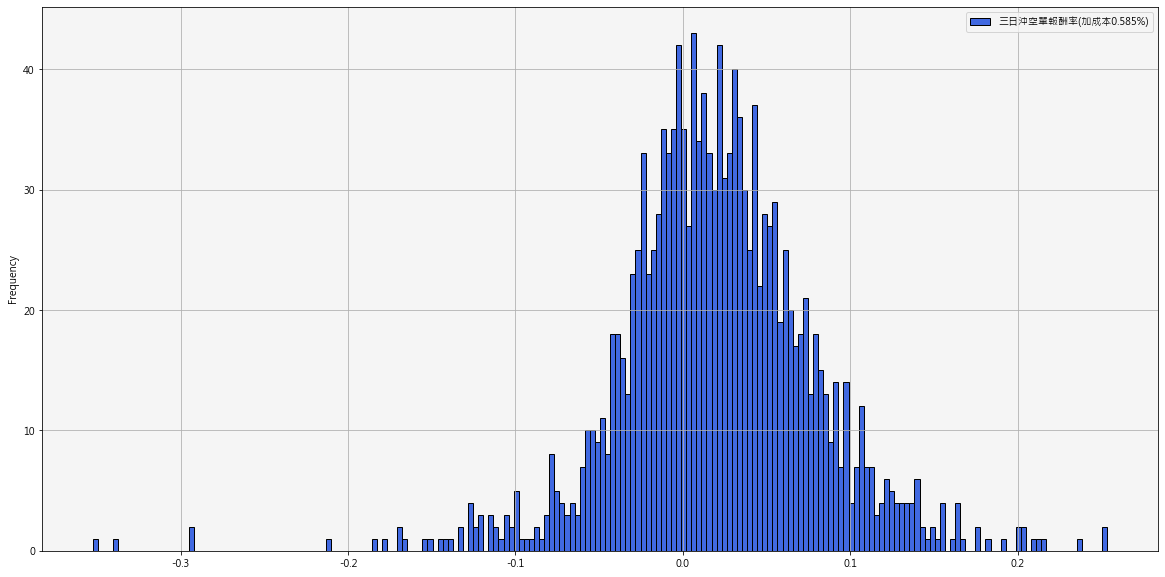

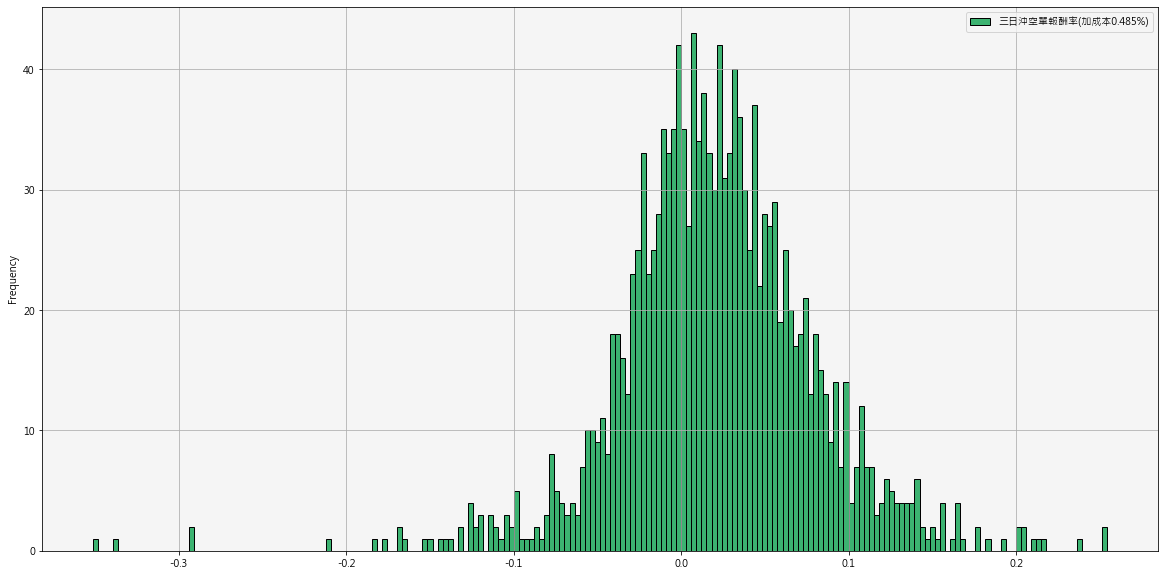

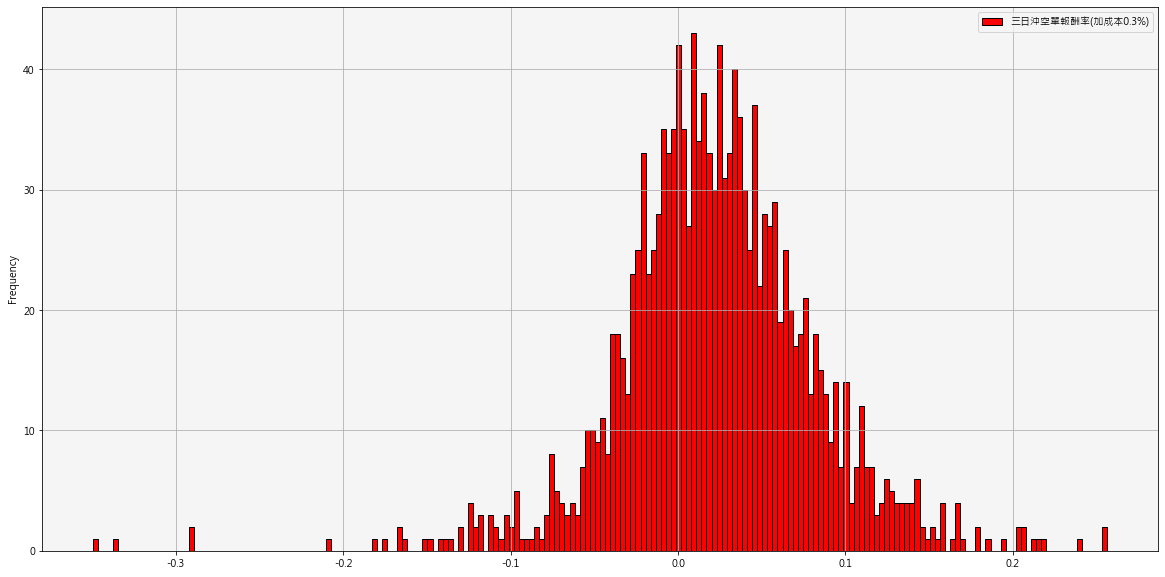

In [181]:
############################################################################################
#每日每股損益分配
#三日沖
############################################################################################
df.set_index('日期')[['三日沖空單報酬率(加成本0.585%)']].plot.hist(edgecolor='black', facecolor = 'royalblue',figsize = (20,10),bins=200,grid = True)
df.set_index('日期')[['三日沖空單報酬率(加成本0.485%)']].plot.hist(edgecolor='black',facecolor = 'mediumseagreen',figsize = (20,10),bins=200,grid = True)
df.set_index('日期')[['三日沖空單報酬率(加成本0.3%)']].plot.hist(edgecolor='black',facecolor = 'red',figsize = (20,10),bins=200,grid = True)

In [182]:
df.set_index('日期')[['三日沖空單報酬率(加成本0.585%)','三日沖空單報酬率(加成本0.485%)','三日沖空單報酬率(加成本0.3%)']].describe().iloc[1:,:]

,三日沖空單報酬率(加成本0.585%),三日沖空單報酬率(加成本0.485%),三日沖空單報酬率(加成本0.3%)
mean,0.019914,0.020914,0.022764
std,0.058748,0.058748,0.058748
min,-0.352473,-0.351473,-0.349623
25%,-0.012437,-0.011437,-0.009587
50%,0.018938,0.019938,0.021788
75%,0.053301,0.054301,0.056151
max,0.253474,0.254474,0.256324


<AxesSubplot: ylabel='Frequency'>

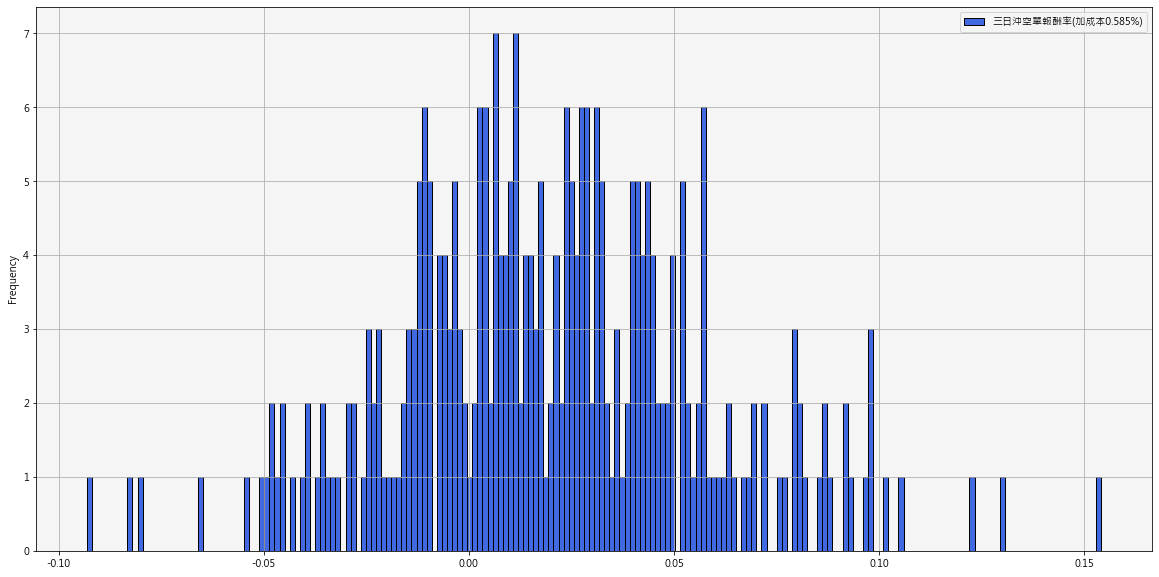

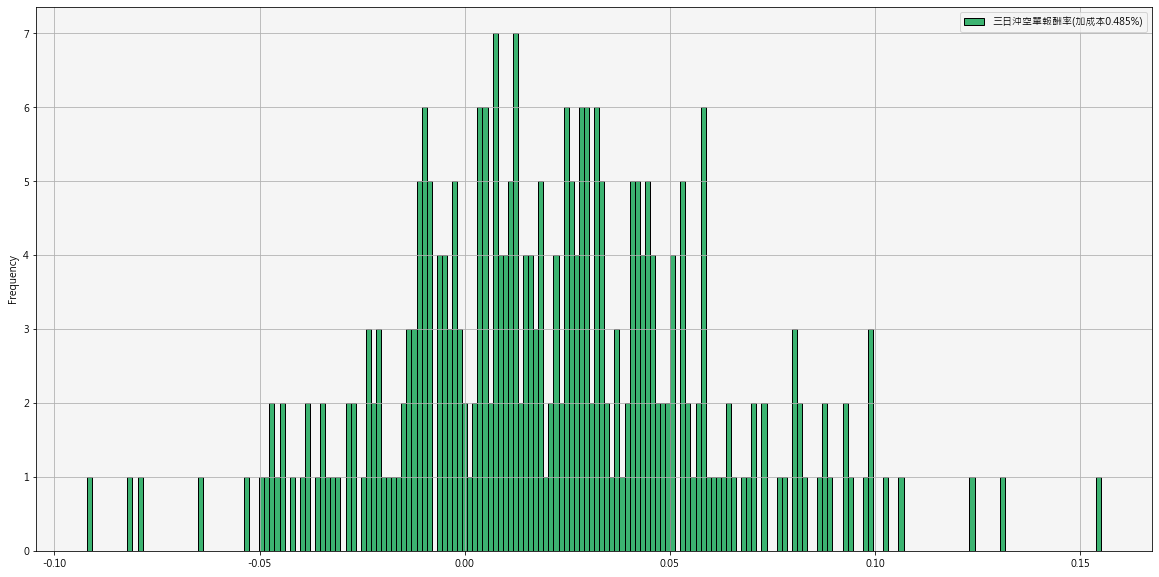

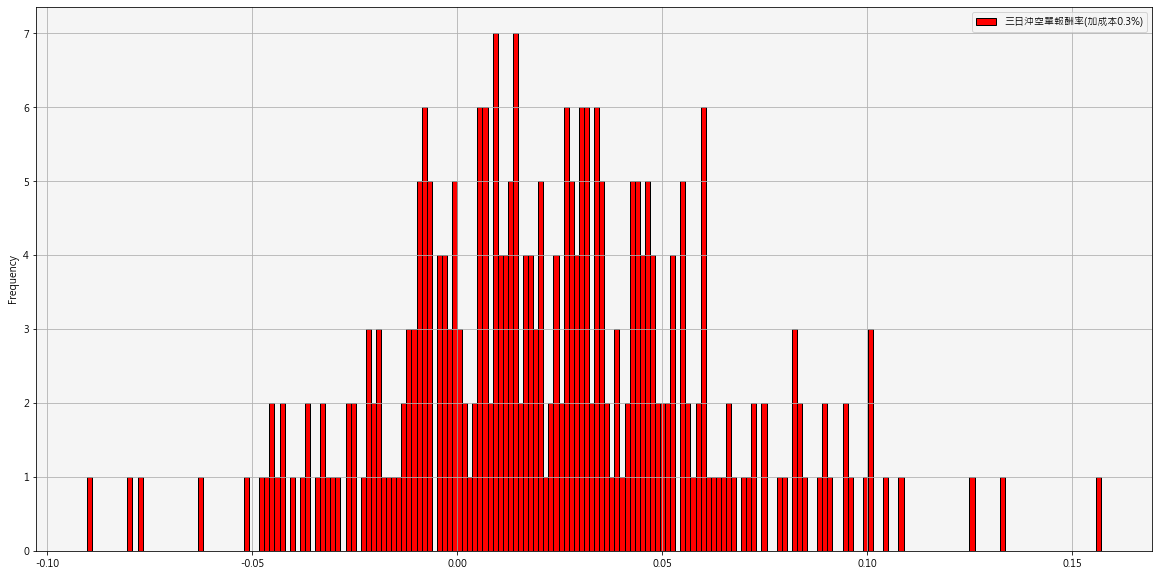

In [183]:
############################################################################################
#每日平均損益分配
#全市場
############################################################################################
df.groupby('日期').mean()[['三日沖空單報酬率(加成本0.585%)']].plot.hist(edgecolor='black',figsize = (20,10), facecolor = 'royalblue',bins=200,grid = True)
df.groupby('日期').mean()[['三日沖空單報酬率(加成本0.485%)']].plot.hist(edgecolor='black', facecolor = 'mediumseagreen', figsize = (20,10),bins=200,grid = True)
df.groupby('日期').mean()[['三日沖空單報酬率(加成本0.3%)']].plot.hist(edgecolor='black', facecolor = 'red' ,figsize = (20,10),bins=200,grid = True)

In [184]:
df.groupby('日期').mean()[['三日沖空單報酬率(加成本0.585%)','三日沖空單報酬率(加成本0.485%)','三日沖空單報酬率(加成本0.3%)']].describe().iloc[1:,:]

,三日沖空單報酬率(加成本0.585%),三日沖空單報酬率(加成本0.485%),三日沖空單報酬率(加成本0.3%)
mean,0.019914,0.020914,0.022764
std,0.037232,0.037232,0.037232
min,-0.093104,-0.092104,-0.090254
25%,-0.005041,-0.004041,-0.002191
50%,0.017944,0.018944,0.020794
75%,0.042556,0.043556,0.045406
max,0.154189,0.155189,0.157039


<AxesSubplot: xlabel='日期'>

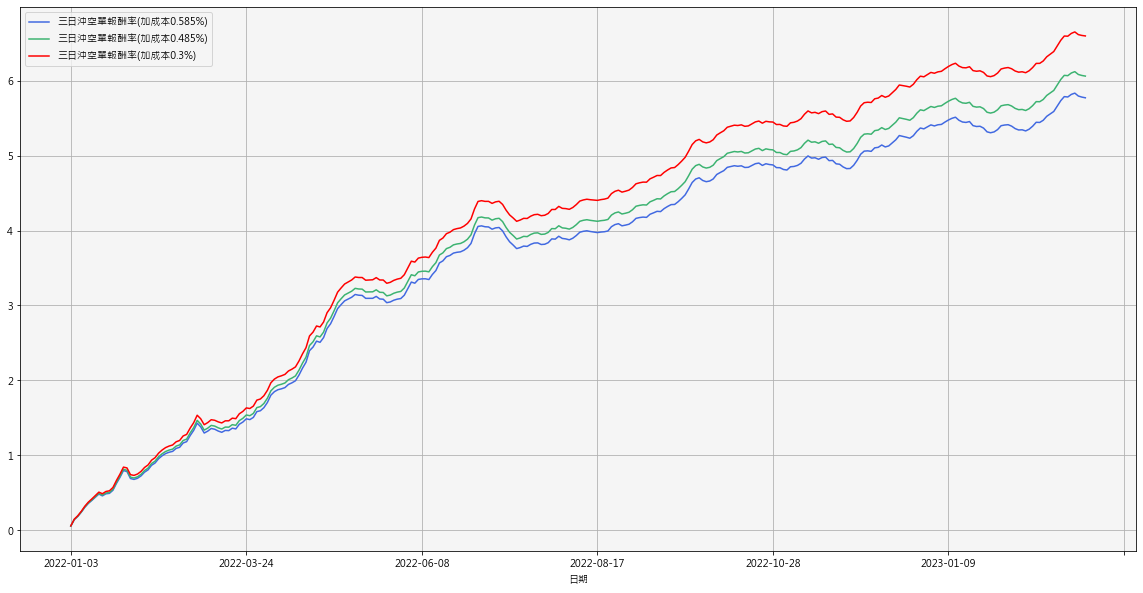

In [185]:
df.groupby('日期').mean().cumsum()[['三日沖空單報酬率(加成本0.585%)','三日沖空單報酬率(加成本0.485%)','三日沖空單報酬率(加成本0.3%)']].plot(figsize=(20, 10),color = ['royalblue','mediumseagreen','red'],grid = True)